<a href="https://colab.research.google.com/github/jitendra986/100-Days-of-Deep-Learning/blob/main/regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25, random_state = 2)

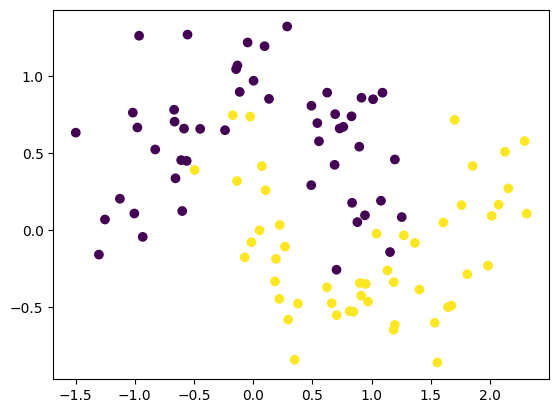

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [4]:


model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [5]:
adam = Adam(learning_rate=0.01)

model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X,y,epochs=2000, validation_split=0.2, verbose=0)

9600/9600 [==============================] - 13s 1ms/step


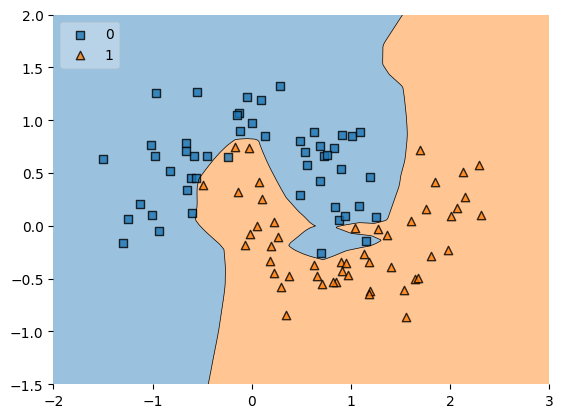

In [6]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model1, legend=2)

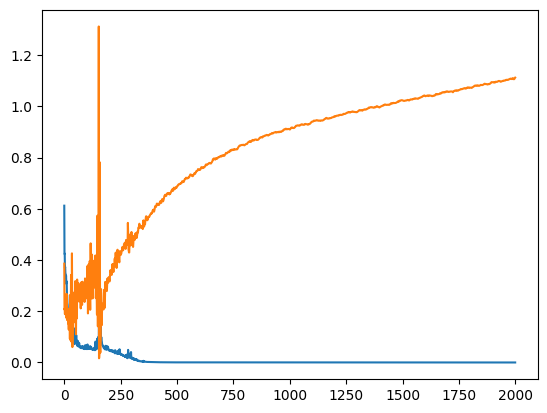

In [7]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [8]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [9]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


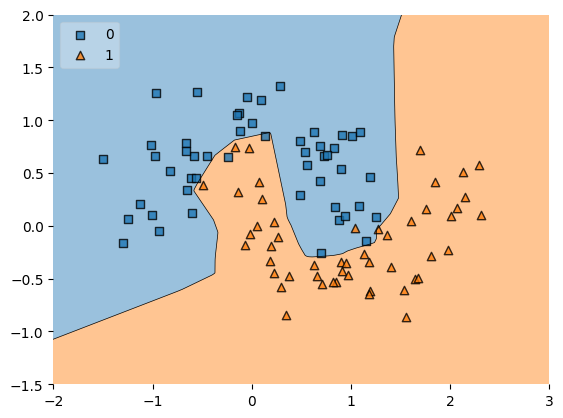

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

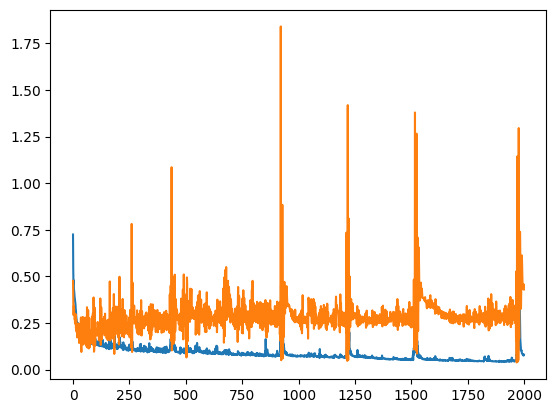

In [11]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [12]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

In [13]:
model1.get_weights()[0].shape
#all weights of layer1
#input layers has 2 units and first hidden layer has 128 units

(2, 128)

In [14]:
model1.get_weights()[0].reshape(256)

array([-5.18482149e-01, -5.03458500e-01, -7.12410733e-02,  2.06305310e-01,
       -3.09577107e-01, -3.17527056e-01, -2.23119602e-01,  1.88415423e-01,
       -5.18483222e-01, -4.47087884e-01, -4.05216008e-01,  2.09221601e-01,
       -4.13520396e-01, -3.85188311e-01,  3.78675550e-01,  1.02335930e-01,
        9.59763769e-03, -4.10316318e-01,  1.05484910e-01,  2.86845267e-01,
        1.15880348e-01,  3.35211247e-01, -3.99605453e-01, -5.32173872e-01,
       -2.91292816e-01,  1.88699469e-01,  2.59549022e-01,  1.67283267e-01,
        1.77714989e-01, -1.64959937e-01,  3.03277791e-01, -6.25370862e-03,
        1.12340832e-02, -4.20606993e-02, -9.92569104e-02, -2.36844458e-02,
       -4.41476762e-01,  2.82169163e-01,  3.52857292e-01,  4.62816715e-01,
        2.75209337e-01, -3.38839032e-02, -3.87474060e-01,  2.63284892e-01,
       -6.59607053e-02,  9.23916027e-02, -3.61196190e-01, -4.44533885e-01,
        1.56921688e-02, -4.42340881e-01, -4.64668274e-01,  1.05595244e-02,
       -2.74594594e-02, -

In [15]:
model1_weight_layer1.shape

(256,)

<Axes: >

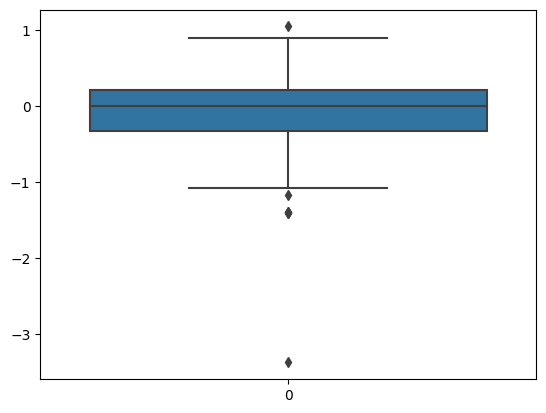

In [16]:
sns.boxplot(model1_weight_layer1)

<Axes: >

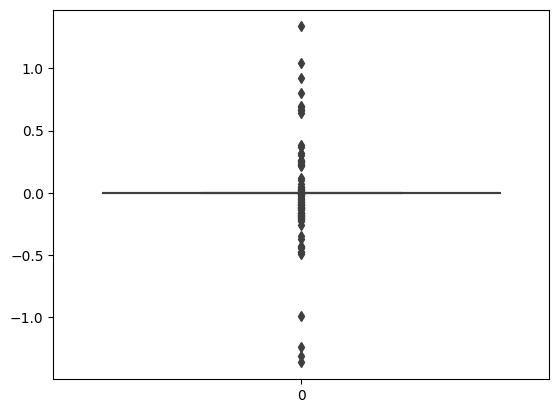

In [17]:
sns.boxplot(model2_weight_layer1)

In [18]:
model1_weight_layer1.min()

-3.371613

In [19]:
model1_weight_layer1.max()

1.0509323

In [20]:
model2_weight_layer1.min()

-1.3634572

In [21]:
model2_weight_layer1.max()

1.3367015

<ipython-input-22-ace9e13e5e86>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1_weight_layer1)
<ipython-input-22-ace9e13e5e86>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model2_weight_layer1)


<Axes: ylabel='Density'>

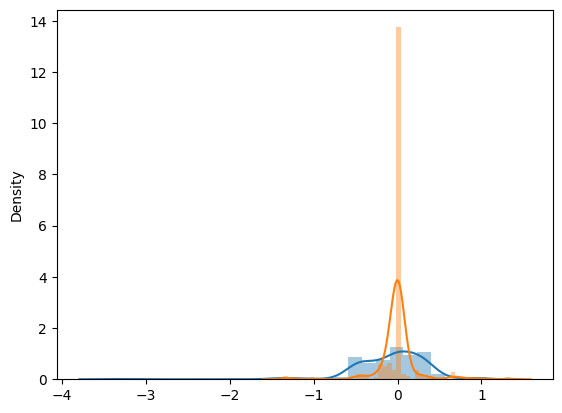

In [22]:
sns.distplot(model1_weight_layer1)
sns.distplot(model2_weight_layer1)
#blue curve is caused by weight without regularization
#Orange curve is caused by weight with regularization

# L1 Regularization

In [23]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [24]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 13s 1ms/step


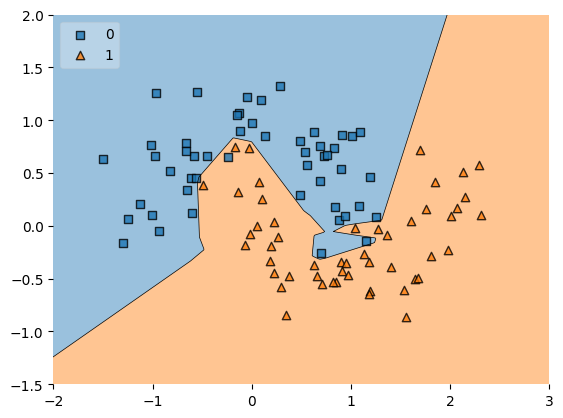

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

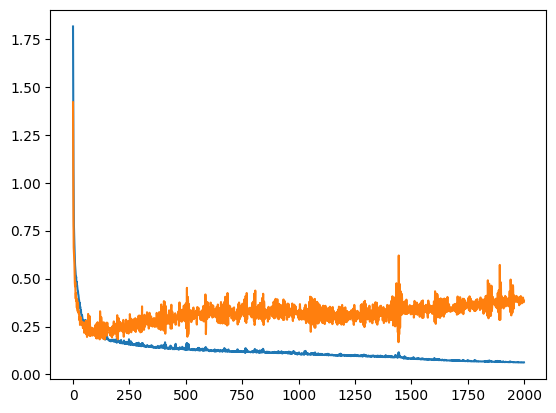

In [26]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])